In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 4\01-09-2022 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_combined.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,Order_day_of_week,order_hour_of_day,Days since last order,New customer,product_id,add_to_cart_order,reordered,...,Order_frequency_flag,First Name,Last Name,Gender,State,Age,Date joined,No of dependents,Marital status,income
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Non-frequent cust,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Non-frequent cust,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Non-frequent cust,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Non-frequent cust,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Non-frequent cust,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


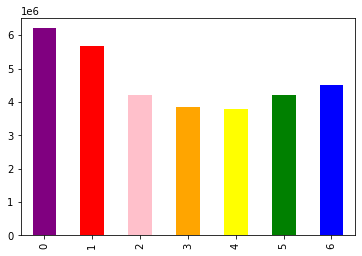

In [30]:
#2 question: create a bar chart, a histogram, a scatterplot, and a line chart
#bar chart:
bar = df['Order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

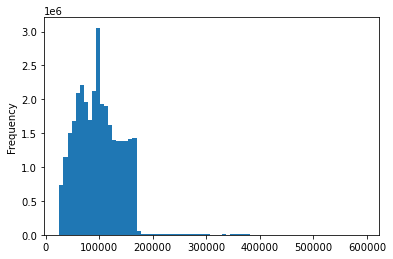

In [34]:
#a histogram
hist = df['income'].plot.hist(bins=75)

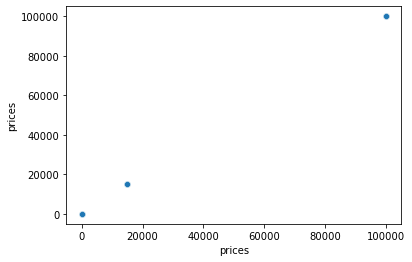

In [23]:
#a scatterplot
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [25]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [26]:
df['prices'].max()

25.0

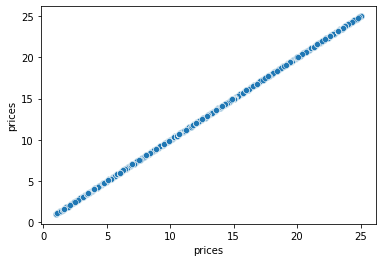

In [27]:
#a scatterplot take 2
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [4]:
#creating a subset for the line chart
#creating a random sampling
np.random.seed(4)

In [5]:
dev = np.random.rand(len(df)) <= 0.7

In [6]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [7]:
big = df[dev]

In [8]:
small = df[~dev]

In [9]:
len(df)

32404859

In [10]:
len(big) + len(small)

32404859

In [11]:
#creating the line chart
df_2 = small[['Order_day_of_week', 'prices']]

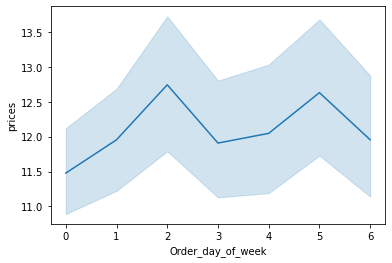

In [12]:
line = sns.lineplot(data = df_2, x = 'Order_day_of_week',y = 'prices')

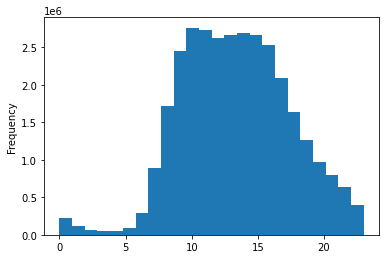

In [14]:
#4 question: create histogram with 'Order_hour_of_day' data and provide insight
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

as we can see from the histogram above describing the hours on the x axis and the order frequency on the y axis, the most popular hours are between 0800-1900. we can also see the quantifyable data below

In [15]:
df['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

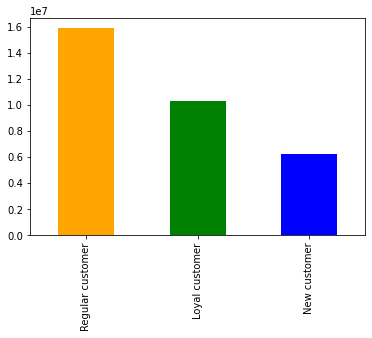

In [16]:
#4 question: Create a bar chart from the “loyalty_flag” column
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(color = ['orange', 'green', 'blue'])

In [17]:
#5 question: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
df_3 = small[['order_hour_of_day', 'prices']]

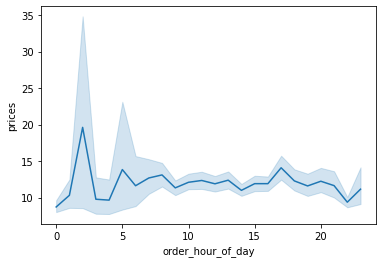

In [18]:
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [19]:
#6 question: is there a connection between age and family situation?  Create a line chart 
df_4 = small [['No of dependents', 'Age']]

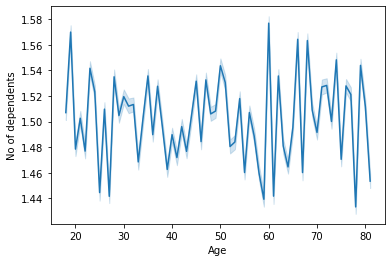

In [20]:
line3 = sns.lineplot(data = df_4, x = 'Age', y = 'No of dependents')

The chart above shows the close relationship between the x axis age and the y axis number of dependents. We can see that in the early 20s and 60s the number of dependents increase. In their late 20s, 50s and 70s they decrease and it stabilizes in the 30s to 50s again.

In [21]:
#7 question: Is there a connection between age and spending power (income)? Create a scatterplot
df_5 = small [['income', 'Age']]

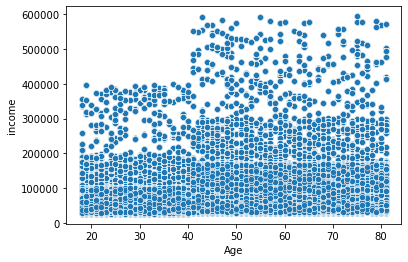

In [43]:
plot_2 = sns.scatterplot(x = 'Age', y = 'income', data = df_5)

The chart above depicts the income y axis and the age x axis of our users. By this chart we can deduct that all of our users at least earn 200K a year no matter their age. Also our users starting in their early 40s and up earn 300K a year. 

In [32]:
#8 export charts
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_4.9.png'))

In [35]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_4.9.png'))

In [36]:
splot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'splot_4.9.png'))

In [37]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_4.9.png'))

In [38]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_4.9.png'))

In [39]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar_4.9.png'))

In [40]:
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_2_4.9.png'))

In [41]:
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_3_4.9.png'))

In [45]:
plot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'plot_2_4.9.png'))